In [1]:
import pandas as pd
import pandas_bokeh
pandas_bokeh.output_notebook()
import geopandas as gpd
import matplotlib.pyplot as plt
import sys
import math
from tqdm import tqdm
import datetime
#import movingpandas as mpd

Loading BokehJS ...

In [35]:
def haversine(lon1, lat1,lon2,lat2):
    R = 6371000  # radius bumi
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * \
    math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  
    return meters

In [36]:
df_pl = pd.read_csv("Peduli_Lindungi_Checkin_Hackathon.csv", sep='|')

In [37]:
df_pr = df_pl[['province_dagri_code','province_name','city_dagri_code','city_name']].sort_values('city_dagri_code').drop_duplicates().copy()

In [38]:
df_pr

,province_dagri_code,province_name,city_dagri_code,city_name
8923,12,SUMATERA UTARA,1271,KOTA MEDAN
170554,12,SUMATERA UTARA,1275,KOTA BINJAI
180637,14,RIAU,1401,KAB. KAMPAR
4017,14,RIAU,1403,KAB. BENGKALIS
172944,14,RIAU,1471,KOTA PEKANBARU
...,...,...,...,...
8645,64,KALIMANTAN TIMUR,6472,KOTA SAMARINDA
186073,73,SULAWESI SELATAN,7309,KAB. MAROS
5743,73,SULAWESI SELATAN,7371,KOTA MAKASSAR
5828,74,SULAWESI TENGGARA,7471,KOTA KENDARI


In [40]:
print(df_pl.info())
print(df_pl.checkin_timestamp.max())
print(df_pl.checkin_timestamp.min())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597179 entries, 0 to 1597178
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   nik_hashed           1597179 non-null  object
 1   user_covid19_status  1597179 non-null  object
 2   gender               1592150 non-null  object
 3   checkin_timestamp    1597179 non-null  object
 4   checkout_timestamp   805716 non-null   object
 5   province_dagri_code  1597179 non-null  int64 
 6   province_name        1597179 non-null  object
 7   city_dagri_code      1597179 non-null  int64 
 8   city_name            1597179 non-null  object
 9   outlet_category      1583287 non-null  object
 10  outlet_sub_category  1585697 non-null  object
 11  user_color_status    1597179 non-null  object
dtypes: int64(2), object(10)
memory usage: 146.2+ MB
None
2022-08-10 23:06:17 UTC
2022-02-10 00:38:21 UTC


In [41]:
df_pl.user_covid19_status.unique()

array(['NOT POSITIVE'], dtype=object)

<AxesSubplot:>

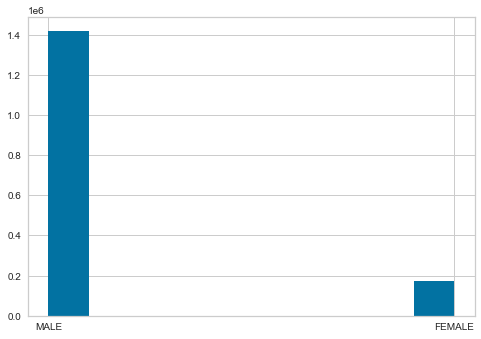

In [42]:
df_pl.gender.hist()

In [43]:
%%time
df_pl['checkin_timestamp'] = pd.to_datetime(list(df_pl.checkin_timestamp.str[:-4]), format='%Y-%m-%d %H:%M:%S')

Wall time: 2.07 s


In [44]:
%%time
df_pl['checkout_timestamp'] = pd.to_datetime(list(df_pl.checkout_timestamp.str[:-4]), format='%Y-%m-%d %H:%M:%S')

Wall time: 2.1 s


In [45]:
df_pl.province_dagri_code.unique()

array([34, 32, 16, 36, 35, 51, 33, 21, 12, 14, 61, 64, 18, 74, 62, 73, 52,
       53, 31, 15, 19, 92], dtype=int64)

In [46]:
df_pl.province_name.unique()

array(['DAERAH ISTIMEWA YOGYAKARTA', 'JAWA BARAT', 'SUMATERA SELATAN',
       'BANTEN', 'JAWA TIMUR', 'BALI', 'JAWA TENGAH', 'KEPULAUAN RIAU',
       'SUMATERA UTARA', 'RIAU', 'KALIMANTAN BARAT', 'KALIMANTAN TIMUR',
       'LAMPUNG', 'SULAWESI TENGGARA', 'KALIMANTAN TENGAH',
       'SULAWESI SELATAN', 'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR',
       'DKI JAKARTA', 'JAMBI', 'KEPULAUAN BANGKA BELITUNG', 'PAPUA BARAT'],
      dtype=object)

In [47]:
df_pl.city_dagri_code.unique()

array([3404, 3201, 1671, 3271, 3671, 3573, 3215, 5103, 3525, 3311, 2171,
       1271, 3604, 3507, 3214, 3274, 1471, 3372, 6171, 3471, 1403, 6471,
       3509, 3602, 1871, 3202, 3579, 5104, 6112, 3322, 5108, 3213, 3577,
       3203, 3277, 3673, 3204, 3211, 7471, 3672, 6271, 7371, 5201, 3402,
       3515, 3571, 3517, 5315, 3272, 3302, 5271, 3101, 1505, 3217, 3310,
       1571, 3376, 3305, 6472, 3403, 3502, 3510, 3401, 3308, 3205, 3514,
       5202, 1971, 3303, 1804, 3505, 3276, 3216, 3275, 3273, 5171, 3374,
       3578, 3603, 1275, 3324, 3210, 3371, 9202, 3375, 3319, 1401, 3576,
       3304, 3516, 7309, 3524, 3674, 3173, 3171, 3175, 3172, 3174],
      dtype=int64)

In [48]:
df_pl.city_name.unique()

array(['KAB. SLEMAN', 'KAB. BOGOR', 'KOTA PALEMBANG', 'KOTA BOGOR',
       'KOTA TANGERANG', 'KOTA MALANG', 'KAB. KARAWANG', 'KAB. BADUNG',
       'KAB. GRESIK', 'KAB. SUKOHARJO', 'KOTA BATAM', 'KOTA MEDAN',
       'KAB. SERANG', 'KAB. MALANG', 'KAB. PURWAKARTA', 'KOTA CIREBON',
       'KOTA PEKANBARU', 'KOTA SURAKARTA', 'KOTA PONTIANAK',
       'KOTA YOGYAKARTA', 'KAB. BENGKALIS', 'KOTA BALIKPAPAN',
       'KAB. JEMBER', 'KAB. LEBAK', 'KOTA BANDAR LAMPUNG',
       'KAB. SUKABUMI', 'KOTA BATU', 'KAB. GIANYAR', 'KAB. KUBU RAYA',
       'KAB. SEMARANG', 'KAB. BULELENG', 'KAB. SUBANG', 'KOTA MADIUN',
       'KAB. CIANJUR', 'KOTA CIMAHI', 'KOTA SERANG', 'KAB. BANDUNG',
       'KAB. SUMEDANG', 'KOTA KENDARI', 'KOTA CILEGON',
       'KOTA PALANGKARAYA', 'KOTA MAKASSAR', 'KAB. LOMBOK BARAT',
       'KAB. BANTUL', 'KAB. SIDOARJO', 'KOTA KEDIRI', 'KAB. JOMBANG',
       'KAB. MANGGARAI BARAT', 'KOTA SUKABUMI', 'KAB. BANYUMAS',
       'KOTA MATARAM', 'KAB. ADM. KEP. SERIBU', 'KAB. MUARO JAMBI',
 

In [49]:
df_pl.outlet_category.unique()

array(['PERBELANJAAN', 'MAKANAN & MINUMAN', 'INDUSTRI', 'PERKANTORAN',
       'SARANA TRANSPORTASI', nan, 'SARANA HIBURAN', 'TEMPAT IBADAH',
       'AKOMODASI', 'FASILITAS KESEHATAN', 'SARANA OLAHRAGA',
       'INSTITUSI PENDIDIKAN', 'KECANTIKAN & RELAKSASI'], dtype=object)

In [50]:
df_pl.outlet_sub_category.unique()

array(['MALL', 'RESTORAN', 'PABRIK / REFINERY / PEMBANGKIT',
       'GEDUNG PERKANTORAN SWASTA', 'STASIUN', 'LAINNYA',
       'DEPARTMENT STORE', 'CAFE', 'BIOSKOP', 'BANK', 'BANDARA',
       'TEMPAT WISATA', 'PURA', 'TOKO RITEL', 'NON-IOMKI', 'TAMAN PUBLIK',
       'HOTEL', 'BAR', 'SUPERMARKET', 'RESTORAN CEPAT SAJI',
       'RUMAH SAKIT', 'KANTOR INSTANSI PEMERINTAH', 'GOLF',
       'GEREJA KRISTEN', 'KOMPLEKS PERUMAHAN', 'WARUNG', 'GEREJA KATOLIK',
       'TENANT MALL', nan, 'TERMINAL', 'GELANGGANG OLAHRAGA',
       'OUTLET MANDIRI', 'PELABUHAN', 'UNIVERSITAS / SEKOLAH TINGGI',
       'MINIMARKET', 'AKOMODASI', 'PASAR TRADISIONAL', 'VIHARA',
       'PUSAT KEBUGARAN', 'SENTRA LOGISTIK ATAU DISTRIBUSI',
       'KANTOR POLISI', 'AULA', 'KLINIK', 'SEKOLAH', 'GEDUNG APARTEMEN',
       'STADIUM', 'SARANA OLAHRAGA', 'RESTORAN TRADISIONAL', 'KARAOKE',
       'MUSEUM', 'GALERI SENI', 'TEMPAT IBADAH', 'PERGUDANGAN', 'SPA',
       'PUSKESMAS', 'SALON', 'APOTEK', 'LABORATORIUM', 'LEMBAGA KURSUS'

<AxesSubplot:>

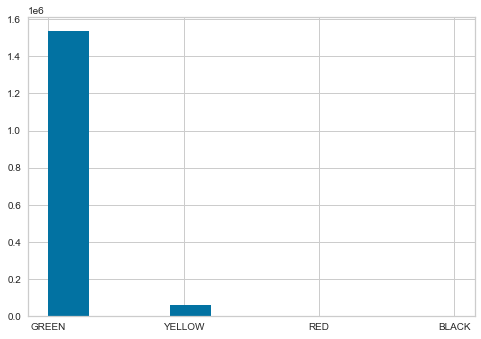

In [51]:
df_pl.user_color_status.hist()

<AxesSubplot:>

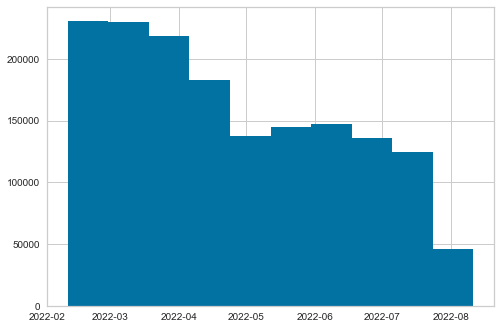

In [52]:
df_pl.checkin_timestamp.hist()

<AxesSubplot:>

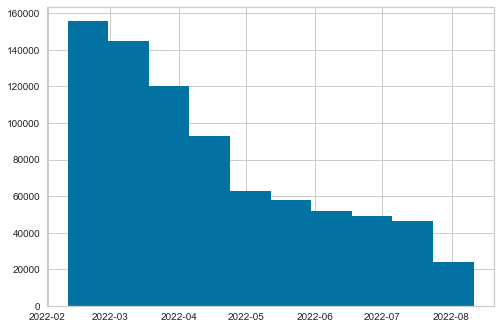

In [53]:
df_pl.checkout_timestamp.hist()

In [54]:

list(df_pl[['province_dagri_code','province_name']].drop_duplicates().sort_values('province_dagri_code').itertuples(index=False, name=None))

[(12, 'SUMATERA UTARA'),
 (14, 'RIAU'),
 (15, 'JAMBI'),
 (16, 'SUMATERA SELATAN'),
 (18, 'LAMPUNG'),
 (19, 'KEPULAUAN BANGKA BELITUNG'),
 (21, 'KEPULAUAN RIAU'),
 (31, 'DKI JAKARTA'),
 (32, 'JAWA BARAT'),
 (33, 'JAWA TENGAH'),
 (34, 'DAERAH ISTIMEWA YOGYAKARTA'),
 (35, 'JAWA TIMUR'),
 (36, 'BANTEN'),
 (51, 'BALI'),
 (52, 'NUSA TENGGARA BARAT'),
 (53, 'NUSA TENGGARA TIMUR'),
 (61, 'KALIMANTAN BARAT'),
 (62, 'KALIMANTAN TENGAH'),
 (64, 'KALIMANTAN TIMUR'),
 (73, 'SULAWESI SELATAN'),
 (74, 'SULAWESI TENGGARA'),
 (92, 'PAPUA BARAT')]

In [55]:
df_latlong = pd.read_csv('list_location_id_csv.csv')

In [56]:
df_latlong['kabko_id'] = df_latlong.kabko.astype('category').cat.codes

In [57]:
df_latlong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kabko     516 non-null    object 
 1   lat       516 non-null    float64
 2   long      516 non-null    float64
 3   kabko_id  516 non-null    int16  
dtypes: float64(2), int16(1), object(1)
memory usage: 13.2+ KB


In [58]:
df_pl['kabko'] = df_pl['city_name'].str.replace('KOTA ADM. JAKARTA BARAT','KOTA JAKARTA').str.replace('KAB. ADM. KEP. SERIBU','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA PUSAT','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA TIMUR','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA UTARA','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA SELATAN','KOTA JAKARTA')

In [59]:
df_pl.kabko = df_pl.kabko.astype(str)
df_latlong.kabko = df_latlong.kabko.astype(str)

In [60]:
df = pd.merge(df_pl, 
         df_latlong, 
         how='left', on='kabko')

In [61]:
len(df.nik_hashed.unique())

4085

In [62]:
geo_df = df[['nik_hashed','gender','checkin_timestamp','checkout_timestamp','province_name','kabko','outlet_category','outlet_sub_category','user_color_status','lat','long','kabko_id','province_dagri_code']]

In [63]:
all_gdf = gpd.GeoDataFrame(geo_df, geometry=gpd.points_from_xy(geo_df.long, geo_df.lat))

In [64]:
%%time
indonesia_gdf = gpd.read_file('indonesia.json')
world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Wall time: 14.2 s


In [65]:
all_gdf

,nik_hashed,gender,checkin_timestamp,checkout_timestamp,province_name,kabko,outlet_category,outlet_sub_category,user_color_status,lat,long,kabko_id,province_dagri_code,geometry
0,93e255c026f7f4ed4a663daf884daac4a3caec8e569f4e...,MALE,2022-03-28 12:24:26,2022-03-28 12:40:57,DAERAH ISTIMEWA YOGYAKARTA,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN,-7.7325,110.4024,353,34,POINT (110.40240 -7.73250)
1,0fdffd869355f5473f4ef62a18ba15ae49aaa6131be12d...,FEMALE,2022-03-28 12:26:16,2022-03-28 17:59:50,JAWA BARAT,KAB. BOGOR,MAKANAN & MINUMAN,RESTORAN,GREEN,-6.5518,106.6291,62,32,POINT (106.62910 -6.55180)
2,2b84a93837c40487dc60b0a02b9f5e7db5c6519c4d95d2...,MALE,2022-03-28 12:52:00,2022-03-28 13:55:52,SUMATERA SELATAN,KOTA PALEMBANG,PERBELANJAAN,MALL,GREEN,-2.9761,104.7754,469,16,POINT (104.77540 -2.97610)
3,681b4354b148a8424a69a8956a06d840b2fccd0d79821f...,MALE,2022-03-28 12:53:13,2022-03-28 13:28:30,DAERAH ISTIMEWA YOGYAKARTA,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN,-7.7325,110.4024,353,34,POINT (110.40240 -7.73250)
4,965891cbdd3406e1f421361874fdbe3550c52b6647923f...,MALE,2022-03-28 12:55:17,2022-03-28 12:55:22,JAWA BARAT,KOTA BOGOR,PERBELANJAAN,MALL,GREEN,-6.5971,106.8060,434,32,POINT (106.80600 -6.59710)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597174,6bab3b46400b3be7fb97dfef46900a291f3660c34419f3...,MALE,2022-08-10 20:10:30,2022-08-10 20:10:40,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,106.8650,445,31,POINT (106.86500 -6.17510)
1597175,c14760038cbc9c26b7787475a323a2e611653627731f91...,MALE,2022-08-10 20:56:25,2022-08-10 20:56:37,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,106.8650,445,31,POINT (106.86500 -6.17510)
1597176,aaaba9edab38b9aa5fdfc12d40b8ba7ffd7416742143c3...,MALE,2022-08-10 20:57:24,2022-08-10 20:57:47,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,106.8650,445,31,POINT (106.86500 -6.17510)
1597177,3c0787b2a569cf6aa59710d7b9dbe91ff518ab0d896ddd...,MALE,2022-08-10 21:08:43,2022-08-10 21:08:43,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,YELLOW,-6.1751,106.8650,445,31,POINT (106.86500 -6.17510)


In [66]:
all_gdf.set_crs(epsg=4326, inplace=True)

,nik_hashed,gender,checkin_timestamp,checkout_timestamp,province_name,kabko,outlet_category,outlet_sub_category,user_color_status,lat,long,kabko_id,province_dagri_code,geometry
0,93e255c026f7f4ed4a663daf884daac4a3caec8e569f4e...,MALE,2022-03-28 12:24:26,2022-03-28 12:40:57,DAERAH ISTIMEWA YOGYAKARTA,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN,-7.7325,110.4024,353,34,POINT (110.40240 -7.73250)
1,0fdffd869355f5473f4ef62a18ba15ae49aaa6131be12d...,FEMALE,2022-03-28 12:26:16,2022-03-28 17:59:50,JAWA BARAT,KAB. BOGOR,MAKANAN & MINUMAN,RESTORAN,GREEN,-6.5518,106.6291,62,32,POINT (106.62910 -6.55180)
2,2b84a93837c40487dc60b0a02b9f5e7db5c6519c4d95d2...,MALE,2022-03-28 12:52:00,2022-03-28 13:55:52,SUMATERA SELATAN,KOTA PALEMBANG,PERBELANJAAN,MALL,GREEN,-2.9761,104.7754,469,16,POINT (104.77540 -2.97610)
3,681b4354b148a8424a69a8956a06d840b2fccd0d79821f...,MALE,2022-03-28 12:53:13,2022-03-28 13:28:30,DAERAH ISTIMEWA YOGYAKARTA,KAB. SLEMAN,PERBELANJAAN,MALL,GREEN,-7.7325,110.4024,353,34,POINT (110.40240 -7.73250)
4,965891cbdd3406e1f421361874fdbe3550c52b6647923f...,MALE,2022-03-28 12:55:17,2022-03-28 12:55:22,JAWA BARAT,KOTA BOGOR,PERBELANJAAN,MALL,GREEN,-6.5971,106.8060,434,32,POINT (106.80600 -6.59710)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597174,6bab3b46400b3be7fb97dfef46900a291f3660c34419f3...,MALE,2022-08-10 20:10:30,2022-08-10 20:10:40,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,106.8650,445,31,POINT (106.86500 -6.17510)
1597175,c14760038cbc9c26b7787475a323a2e611653627731f91...,MALE,2022-08-10 20:56:25,2022-08-10 20:56:37,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,106.8650,445,31,POINT (106.86500 -6.17510)
1597176,aaaba9edab38b9aa5fdfc12d40b8ba7ffd7416742143c3...,MALE,2022-08-10 20:57:24,2022-08-10 20:57:47,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,106.8650,445,31,POINT (106.86500 -6.17510)
1597177,3c0787b2a569cf6aa59710d7b9dbe91ff518ab0d896ddd...,MALE,2022-08-10 21:08:43,2022-08-10 21:08:43,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,YELLOW,-6.1751,106.8650,445,31,POINT (106.86500 -6.17510)


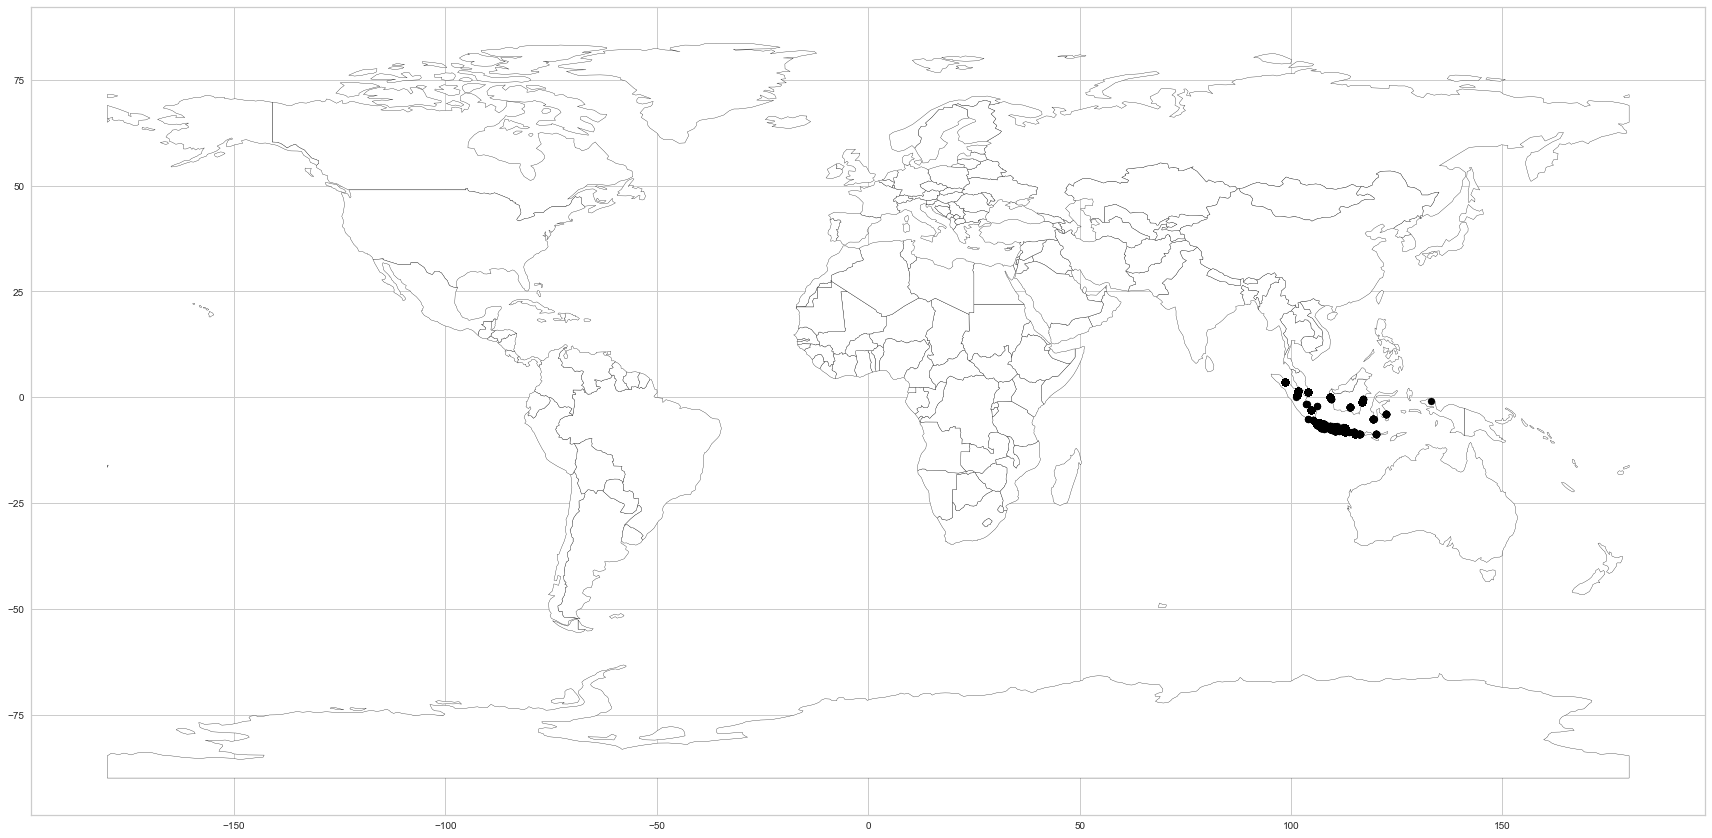

Wall time: 1min 48s


In [67]:
%%time
ax = world_gdf.plot(color='white', edgecolor='black',figsize=(30,30))

all_gdf.plot(ax=ax, color='black')
plt.show()

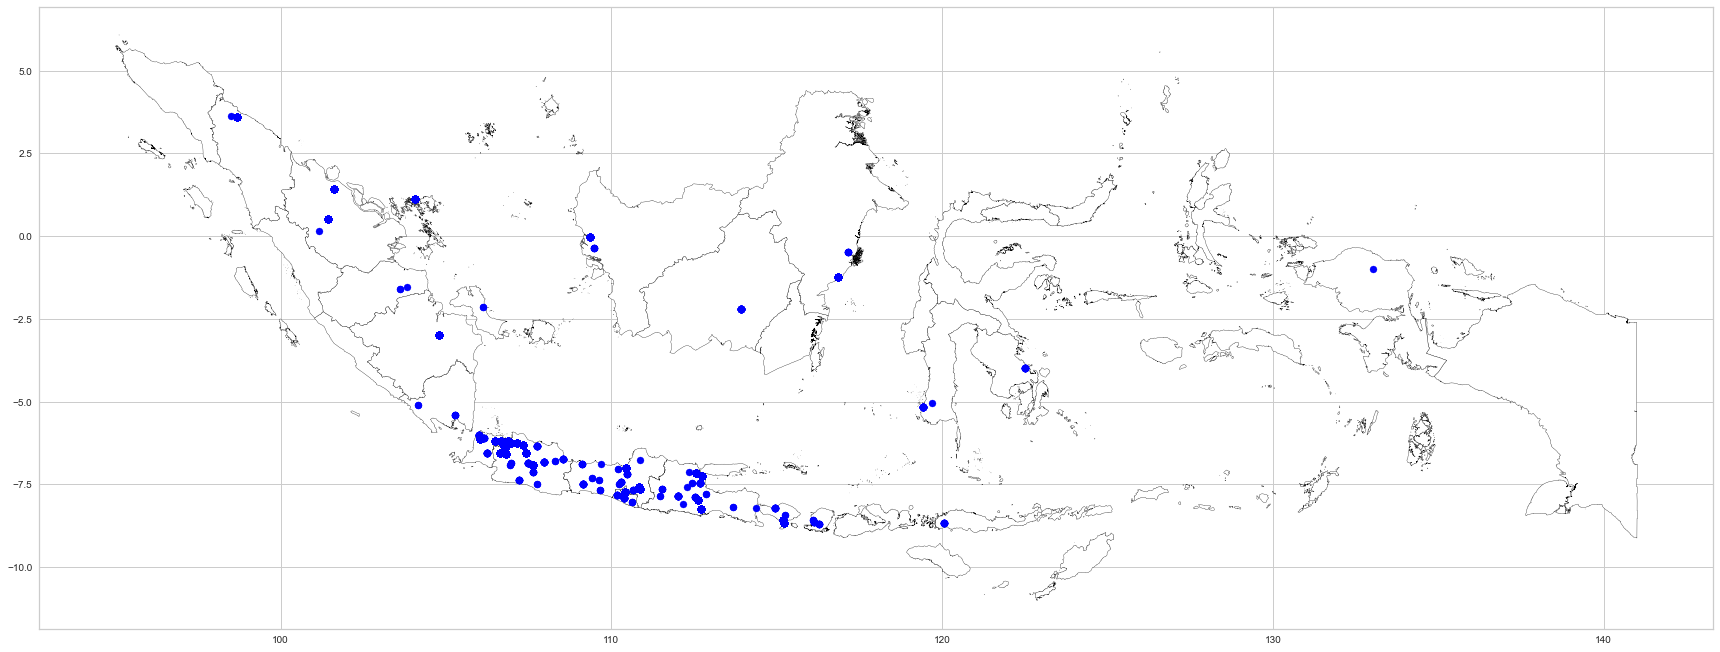

Wall time: 1min 59s


In [68]:
%%time
ax = indonesia_gdf.plot(color='white', edgecolor='black',figsize=(30,30))

all_gdf.plot(ax=ax, color='blue')
plt.show()

In [69]:
all_gdf['bulan'] = all_gdf.checkin_timestamp.dt.month
all_gdf['hari'] = all_gdf.checkin_timestamp.dt.day
all_gdf['jam'] = all_gdf.checkin_timestamp.dt.hour
all_gdf['menit'] = all_gdf.checkin_timestamp.dt.minute

In [70]:
sort_df = all_gdf.sort_values(['nik_hashed','checkin_timestamp']).copy()

In [85]:
#test_df = sort_df[sort_df.nik_hashed=='fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1ab10cc401081114809c'].copy()
test_df = sort_df.copy()

In [86]:
test_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1597179 entries, 156882 to 321772
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   nik_hashed           1597179 non-null  object        
 1   gender               1592150 non-null  object        
 2   checkin_timestamp    1597179 non-null  datetime64[ns]
 3   checkout_timestamp   805716 non-null   datetime64[ns]
 4   province_name        1597179 non-null  object        
 5   kabko                1597179 non-null  object        
 6   outlet_category      1583287 non-null  object        
 7   outlet_sub_category  1585697 non-null  object        
 8   user_color_status    1597179 non-null  object        
 9   lat                  1597179 non-null  float64       
 10  long                 1597179 non-null  float64       
 11  kabko_id             1597179 non-null  int16         
 12  province_dagri_code  1597179 non-null  int64

In [87]:
test_df['next_province_name'] = None
test_df['next_kabko'] = None
test_df['next_lat'] = None
test_df['next_long'] = None
test_df['next_kabko_id'] = None
test_df['next_checkin_timestamp'] = None
test_df['next_province_dagri_code'] = None

In [88]:
list_unique = []
count = 0
with tqdm(total=test_df['nik_hashed'].count(), file=sys.stdout) as pbar:
    for i, row in enumerate(test_df.itertuples(index=False)):
        if len(list_unique) < 1:
            list_unique.append(row)
        elif ((list_unique[len(list_unique)-1][0] == row.nik_hashed) &
                (list_unique[len(list_unique)-1][4] == row.province_name) &
                (list_unique[len(list_unique)-1][5] == row.kabko)):
                pass
        else:
            if (list_unique[len(list_unique)-1][0] == row.nik_hashed):
                templist = list(list_unique[len(list_unique)-1])
                templist[18] = row.province_name
                templist[19] = row.kabko
                templist[20] = row.lat
                templist[21] = row.long
                templist[22] = int(row.kabko_id)
                templist[23] = row.checkin_timestamp
                templist[24] = row.province_dagri_code
                list_unique[len(list_unique)-1] = tuple(templist)
            list_unique.append(row)
        count = count+1
        #pbar.set_description('processed: %d' % (count))
        pbar.update(1)
new_df = gpd.GeoDataFrame(list_unique, columns=test_df.columns)
new_df.set_crs(epsg=4326, inplace=True)

100%|████████████████████████████████████████████████████████████████████| 1597179/1597179 [00:15<00:00, 105986.98it/s]


,nik_hashed,gender,checkin_timestamp,checkout_timestamp,province_name,kabko,outlet_category,outlet_sub_category,user_color_status,lat,...,hari,jam,menit,next_province_name,next_kabko,next_lat,next_long,next_kabko_id,next_checkin_timestamp,next_province_dagri_code
0,00014146775636351ecb563d3fcb6ac95f23ee0f94fc32...,FEMALE,2022-03-14 19:39:49,NaT,BANTEN,KAB. TANGERANG,PERBELANJAAN,MALL,GREEN,-6.1872,...,14,19,39,None,None,NaN,NaN,NaN,NaT,NaN
1,001cbf1df4a14437190f9c7faa3b2d39c25e77e3093258...,MALE,2022-02-10 12:34:58,2022-02-10 14:55:06,DKI JAKARTA,KOTA JAKARTA,NaN,NaN,GREEN,-6.1751,...,10,12,34,None,None,NaN,NaN,NaN,NaT,NaN
2,001dbb2a1f20523ba4e594873d098b2d0bee49f3816b32...,MALE,2022-02-10 08:33:06,2022-02-10 08:41:25,DKI JAKARTA,KOTA JAKARTA,PERKANTORAN,GEDUNG PERKANTORAN SWASTA,GREEN,-6.1751,...,10,8,33,None,None,NaN,NaN,NaN,NaT,NaN
3,00216648c32a6977f27abf90d51dce6fdf4f603f1ef2ab...,MALE,2022-02-10 10:53:33,2022-02-10 15:05:29,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,10,10,53,None,None,NaN,NaN,NaN,NaT,NaN
4,0023f771bbdee4a1b5e8e32d3d75b4e4772e4c6d4a89dc...,FEMALE,2022-02-10 15:04:48,2022-02-10 15:04:59,BANTEN,KAB. TANGERANG,PERBELANJAAN,SUPERMARKET,GREEN,-6.1872,...,10,15,4,BANTEN,KOTA TANGERANG SELATAN,-6.2835,106.7113,499.0,2022-02-10 16:05:24,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91754,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,MALE,2022-06-28 18:11:45,2022-06-28 18:12:27,BALI,KOTA DENPASAR,PERBELANJAAN,MALL,GREEN,-8.6705,...,28,18,11,DKI JAKARTA,KOTA JAKARTA,-6.1751,106.8650,445.0,2022-06-28 18:12:27,31.0
91755,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,MALE,2022-06-28 18:12:27,NaT,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,28,18,12,JAWA BARAT,KOTA BEKASI,-6.2383,106.9756,428.0,2022-07-04 17:14:21,32.0
91756,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,MALE,2022-07-04 17:14:21,NaT,JAWA BARAT,KOTA BEKASI,PERBELANJAAN,MALL,GREEN,-6.2383,...,4,17,14,DKI JAKARTA,KOTA JAKARTA,-6.1751,106.8650,445.0,2022-07-05 10:47:28,31.0
91757,fff194187acd1f330cf7cfa79481fe9afed4de9c0c3c1a...,MALE,2022-07-05 10:47:28,NaT,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,5,10,47,None,None,NaN,NaN,NaN,NaT,NaN


In [89]:
new_df['kabko_id'] = new_df['kabko_id'].astype(float)

In [90]:
new_df = new_df[new_df['next_province_name'].notna()].copy()

In [91]:
new_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 87674 entries, 4 to 91756
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   nik_hashed                87674 non-null  object        
 1   gender                    87492 non-null  object        
 2   checkin_timestamp         87674 non-null  datetime64[ns]
 3   checkout_timestamp        35541 non-null  datetime64[ns]
 4   province_name             87674 non-null  object        
 5   kabko                     87674 non-null  object        
 6   outlet_category           87140 non-null  object        
 7   outlet_sub_category       87229 non-null  object        
 8   user_color_status         87674 non-null  object        
 9   lat                       87674 non-null  float64       
 10  long                      87674 non-null  float64       
 11  kabko_id                  87674 non-null  float64       
 12  province_d

In [92]:
%%time
new_df['t'] = new_df.checkin_timestamp
new_df['trajectory_id'] = new_df.nik_hashed.astype('category').cat.codes
new_df['duration'] = new_df.next_checkin_timestamp - new_df.checkin_timestamp
new_df['distance_meter'] = new_df.apply(lambda x: haversine(x.long,x.lat,x.next_long,x.next_lat), axis=1)

Wall time: 4.84 s


In [93]:
new_df.sort_values('duration')

,nik_hashed,gender,checkin_timestamp,checkout_timestamp,province_name,kabko,outlet_category,outlet_sub_category,user_color_status,lat,...,next_kabko,next_lat,next_long,next_kabko_id,next_checkin_timestamp,next_province_dagri_code,t,trajectory_id,duration,distance_meter
90753,fd0eea2ef809036000af13a64cb274cfdf56ac7174ab5b...,MALE,2022-02-21 10:08:05,2022-02-21 10:08:13,BALI,KOTA DENPASAR,PERBELANJAAN,MALL,GREEN,-8.6705,...,KOTA JAKARTA,-6.1751,106.8650,445.0,2022-02-21 10:08:05,31.0,2022-02-21 10:08:05,1448,0 days 00:00:00,961260.848420
19592,3596d62de8e834b38275d04c7bbea98b679eeaa9fcc888...,MALE,2022-04-13 11:27:08,NaT,JAWA BARAT,KOTA DEPOK,SARANA TRANSPORTASI,STASIUN,GREEN,-6.4025,...,KOTA JAKARTA,-6.1751,106.8650,445.0,2022-04-13 11:27:08,31.0,2022-04-13 11:27:08,323,0 days 00:00:00,26468.888199
19718,3596d62de8e834b38275d04c7bbea98b679eeaa9fcc888...,MALE,2022-07-12 11:15:26,NaT,JAWA BARAT,KOTA DEPOK,SARANA TRANSPORTASI,STASIUN,GREEN,-6.4025,...,KOTA TANGERANG SELATAN,-6.2835,106.7113,499.0,2022-07-12 11:15:27,36.0,2022-07-12 11:15:26,323,0 days 00:00:01,16094.298377
36104,6398121fae59d99f25cea558341d27d057a6fddf3ea485...,MALE,2022-06-01 14:22:56,2022-06-01 14:22:57,BANTEN,KOTA TANGERANG,PERBELANJAAN,DEPARTMENT STORE,GREEN,-6.2024,...,KAB. TANGERANG,-6.1872,106.4877,382.0,2022-06-01 14:22:57,36.0,2022-06-01 14:22:56,577,0 days 00:00:01,18318.169116
76062,d69223fa8e0172263f296c42fded115cc0e8533649f5b9...,FEMALE,2022-03-08 08:35:06,2022-03-08 09:58:56,JAWA BARAT,KOTA BEKASI,SARANA TRANSPORTASI,STASIUN,GREEN,-6.2383,...,KOTA JAKARTA,-6.1751,106.8650,445.0,2022-03-08 08:35:07,31.0,2022-03-08 08:35:06,1217,0 days 00:00:01,14101.873175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61248,afed0f115610cc66ad68386948d6be76a43ca236a401e9...,MALE,2022-02-10 09:32:13,2022-02-10 11:21:18,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,KOTA TANGERANG,-6.2024,106.6527,498.0,2022-08-05 09:00:35,36.0,2022-02-10 09:32:13,999,175 days 23:28:22,23664.613888
60604,aee88e0ede2cca91ef930106723d431c64a628e4c21a5a...,MALE,2022-02-10 11:08:44,2022-02-10 11:17:39,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,KOTA BEKASI,-6.2383,106.9756,428.0,2022-08-06 12:02:41,32.0,2022-02-10 11:08:44,994,177 days 00:53:57,14101.873175
74031,d24a1053a3c1feeb01f87b74452c973a4f5f7f7cbb5035...,MALE,2022-02-10 12:51:05,2022-02-10 12:51:38,DKI JAKARTA,KOTA JAKARTA,PERBELANJAAN,MALL,GREEN,-6.1751,...,KAB. LAMONGAN,-7.1269,112.3338,188.0,2022-08-06 14:01:54,35.0,2022-02-10 12:51:05,1191,177 days 01:10:49,613202.359831
20238,37be5b89ffd673153d82763c1239c03fec1799e6965398...,MALE,2022-02-10 12:49:33,2022-02-10 13:02:50,DKI JAKARTA,KOTA JAKARTA,AKOMODASI,HOTEL,GREEN,-6.1751,...,KAB. BOGOR,-6.5518,106.6291,62.0,2022-08-06 18:59:31,32.0,2022-02-10 12:49:33,340,177 days 06:09:58,49336.962399


In [94]:
proses_df = new_df[~((new_df.duration < datetime.timedelta(minutes=10))&(new_df.distance_meter > 100000))].copy()

# Menjadikan dalam satu eksekusi 

In [95]:
print('AMBIL DATA DAN SESUAIKAN TIPE DATA')
df_pl = pd.read_csv(f"Peduli_Lindungi_Checkin_Hackathon.csv", sep='|')
df_latlong = pd.read_csv(f'list_location_id_csv.csv')
df_latlong['kabko_id'] = df_latlong.kabko.astype('category').cat.codes
df_pl['checkin_timestamp'] = pd.to_datetime(list(df_pl.checkin_timestamp.str[:-4]), format='%Y-%m-%d %H:%M:%S')
df_pl['kabko'] = df_pl['city_name'].str.replace('KOTA ADM. JAKARTA BARAT','KOTA JAKARTA').str.replace('KAB. ADM. KEP. SERIBU','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA PUSAT','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA TIMUR','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA UTARA','KOTA JAKARTA').str.replace('KOTA ADM. JAKARTA SELATAN','KOTA JAKARTA')
df_pl.kabko = df_pl.kabko.astype(str)
df_latlong.kabko = df_latlong.kabko.astype(str)

print('GABUNGKAN DENGAN KOORDINAT')
df = pd.merge(df_pl, df_latlong, how='left', on='kabko')
all_gdf = df[['nik_hashed','checkin_timestamp','province_name','kabko','lat','long','kabko_id','province_dagri_code']].copy()
all_gdf['bulan'] = all_gdf.checkin_timestamp.dt.month
all_gdf['hari'] = all_gdf.checkin_timestamp.dt.day
all_gdf['jam'] = all_gdf.checkin_timestamp.dt.hour
all_gdf['menit'] = all_gdf.checkin_timestamp.dt.minute

print('PROSES PEMISAHAN KOTA AWAL DAN KOTA TUJUAN')
sort_df = all_gdf.sort_values(['nik_hashed','checkin_timestamp']).copy()
test_df = sort_df.copy()
test_df['next_province_name'] = None
test_df['next_kabko'] = None
test_df['next_lat'] = None
test_df['next_long'] = None
test_df['next_kabko_id'] = None
test_df['next_checkin_timestamp'] = None
test_df['next_province_dagri_code'] = None
list_unique = []
for i, row in enumerate(test_df.itertuples(index=False)):
    if len(list_unique) < 1:
        list_unique.append(row)
    elif ((list_unique[len(list_unique)-1][0] == row.nik_hashed) &
            (list_unique[len(list_unique)-1][2] == row.province_name) &
            (list_unique[len(list_unique)-1][3] == row.kabko)):
            pass
    else:
        if (list_unique[len(list_unique)-1][0] == row.nik_hashed):
            templist = list(list_unique[len(list_unique)-1])
            templist[12] = row.province_name
            templist[13] = row.kabko
            templist[14] = row.lat
            templist[15] = row.long
            templist[16] = int(row.kabko_id)
            templist[17] = row.checkin_timestamp
            templist[18] = int(row.province_dagri_code)
            list_unique[len(list_unique)-1] = tuple(templist)
        list_unique.append(row)
new_df = pd.DataFrame(list_unique, columns=test_df.columns)

print('TAMBAHAN DURASI DAN JARAK ANTAR KOTA')
new_df = new_df[new_df['next_province_name'].notna()].copy()
new_df['kabko_id'] = new_df['kabko_id'].astype(float)
new_df['t'] = new_df.checkin_timestamp
new_df['trajectory_id'] = new_df.nik_hashed.astype('category').cat.codes
new_df['duration'] = new_df.next_checkin_timestamp - new_df.checkin_timestamp
new_df['distance_meter'] = new_df.apply(lambda x: haversine(x.long,x.lat,x.next_long,x.next_lat), axis=1)

proses_df = new_df[~((new_df.duration < datetime.timedelta(minutes=10))&(new_df.distance_meter > 100000))].copy()
print('SELESAI')

AMBIL DATA DAN SESUAIKAN TIPE DATA
GABUNGKAN DENGAN KOORDINAT
PROSES PEMISAHAN KOTA AWAL DAN KOTA TUJUAN
TAMBAHAN DURASI DAN JARAK ANTAR KOTA
SELESAI


In [96]:
#proses_df.to_csv('proses_data.csv')

In [97]:
#proses_df = pd.read_csv(f'proses_data.csv')

In [98]:
#proses_df['province_dagri_code'] = proses_df['province_dagri_code'].astype(int)
#proses_df['next_province_dagri_code'] = proses_df['next_province_dagri_code'].astype(int)

In [99]:
proses_df.columns

Index(['nik_hashed', 'checkin_timestamp', 'province_name', 'kabko', 'lat',
       'long', 'kabko_id', 'province_dagri_code', 'bulan', 'hari', 'jam',
       'menit', 'next_province_name', 'next_kabko', 'next_lat', 'next_long',
       'next_kabko_id', 'next_checkin_timestamp', 'next_province_dagri_code',
       't', 'trajectory_id', 'duration', 'distance_meter'],
      dtype='object')

In [100]:
ml_df = proses_df[['kabko_id', 'bulan', 'hari', 'jam', 'menit', 'next_kabko_id']]

In [101]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86643 entries, 4 to 91756
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kabko_id       86643 non-null  float64
 1   bulan          86643 non-null  int64  
 2   hari           86643 non-null  int64  
 3   jam            86643 non-null  int64  
 4   menit          86643 non-null  int64  
 5   next_kabko_id  86643 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 4.6 MB


In [102]:
#ml_df['hari'] = ml_df['hari'].astype('int64')
#ml_df['jam'] = ml_df['jam'].astype('int64')
#ml_df['menit'] = ml_df['menit'].astype('int64')
#ml_df['kabko_id'] = ml_df['kabko_id'].astype('int64')
#ml_df['next_kabko_id'] = ml_df['next_kabko_id'].astype('int64')

In [33]:
from pycaret.classification import *
exp = setup(ml_df, target='next_kabko_id', experiment_name = 'exp1',data_split_shuffle=True, fold=5)

,Description,Value
0,session_id,1203
1,Target,next_kabko_id
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(86643, 6)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [34]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.5898,0.0000,0.1219,0.5353,0.5375,0.4448,0.4554,56.1940
gbc,Gradient Boosting Classifier,0.5858,0.0000,0.0835,0.5394,0.5143,0.4334,0.4479,353.9020
rf,Random Forest Classifier,0.5457,0.0000,0.0702,0.4985,0.5177,0.3911,0.3930,9.2820
knn,K Neighbors Classifier,0.5425,0.0000,0.0909,0.4968,0.5139,0.3895,0.3918,1.0740
et,Extra Trees Classifier,0.5337,0.0000,0.0699,0.4940,0.5113,0.3784,0.3796,21.3800
dt,Decision Tree Classifier,0.4945,0.0000,0.1095,0.5005,0.4972,0.3468,0.3468,0.1540
dummy,Dummy Classifier,0.4268,0.0000,0.0196,0.1822,0.2553,0.0000,0.0000,0.1060
ridge,Ridge Classifier,0.4261,0.0000,0.0196,0.1878,0.2556,0.0002,0.0014,0.1180
lr,Logistic Regression,0.4255,0.0000,0.0197,0.2084,0.2571,0.0008,0.0047,102.3160
lda,Linear Discriminant Analysis,0.3839,0.0000,0.0315,0.2075,0.2538,-0.0078,-0.0124,0.2180
